# E2a: Küchentischversuch zum Laval-Rotor

Name: Noah Michel 
Datum: 12.01.2024  

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:
- Wie stark vibrieren bestimmte Geräte?
- Wie kann dies am besten gemessen werden?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/IMG_20240110_151817.jpg" width="500">

- Beschreibung des Aufbaus: Ein Lautsprecher wo der Sensor angebracht wurde. 
- Vorgangsbeschreibung: Ich habe Laute Musik gespielt wobei der Lautsprecher zu vibrieren angefangen hat.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [15]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)


#### 1a. Einlesen der Mess- und Metadaten

In [16]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240110_151839_Noah_Michel_Lautsprecher"
h5_file_name = "data_20240110_151839_Noah_Michel_Lautsprecher.h5"
# ---------------------------------------------------------------------------------------------#1-end

In [17]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240110_151839_Noah_Michel_Lautsprecher/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240110_151839_Noah_Michel_Lautsprecher/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240110_151839_Noah_Michel_Lautsprecher/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaa1e0-f0f3-608f-b49c-139f446b0fdf": {
    "type": "probe",
    "name": "Lautsprecher",
    "comment": "",
    "path":

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [18]:
f = h5py.File("measurement_data/data_20240110_151839_Noah_Michel_Lautsprecher/data_20240110_151839_Noah_Michel_Lautsprecher.h5", "r")

rawdata = f.get('RawData')

#Name der Gruppe in variable speichern, da nur eine Gruppe vorhanden ist geht dies mit einer Schleife

for i in rawdata:
    key = i

#Beschleunigungsanteile auslesen
    
acc_x = np.array(f.get("RawData/" + str(key) + "/acceleration_x"))
acc_y = np.array(f.get("RawData/" + str(key) + "/acceleration_y"))
acc_z = np.array(f.get("RawData/" + str(key) + "/acceleration_z"))
time = np.array(f.get("RawData/" + str(key) + "/timestamp"))

print(acc_x)
print(acc_y)
print(acc_z)
print(time)


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [19]:
len_time = len(time)

list_betrag = []

#Betrag mit schleife und Funktion in Liste speichern

for i in range(len_time):
    list_betrag.append(get_vec_accel(acc_x[i], acc_y[i], acc_z[i]))

[10.949562787592594, 10.944924363086917, 11.142287937839834, 10.916065756177632, 10.945275827699882, 10.930715741976206, 10.925153878377603, 10.952443243928839, 11.002834049079269, 10.921632247922066, 11.08177485048147, 10.559244072297275, 11.06662963763564, 11.038437726727171, 11.028815133026324, 10.956867835233696, 10.950476185050164, 10.982747502661999, 11.058701404585156, 10.916065756177632, 10.895183736565262, 10.965080196607925, 10.892994452534245, 10.997168739890542, 10.959395371100129, 11.198902329381454, 10.999756959182575, 10.977352175905912, 10.918391344701995, 10.930715741976206, 11.001225677631755, 10.878859449107237, 10.8660514208576, 10.954690878715127, 11.02302358557864, 11.161535964413691, 11.068506545265247, 10.987510003875423, 10.830733486668231, 11.03320909734637, 11.11899409919815, 10.932193735979308, 10.93951038211178, 10.933038214273099, 11.034952249079092, 11.001155743104299, 11.020580454452405, 11.021767185781366, 10.916065756177632, 10.79280532681782, 11.03606

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

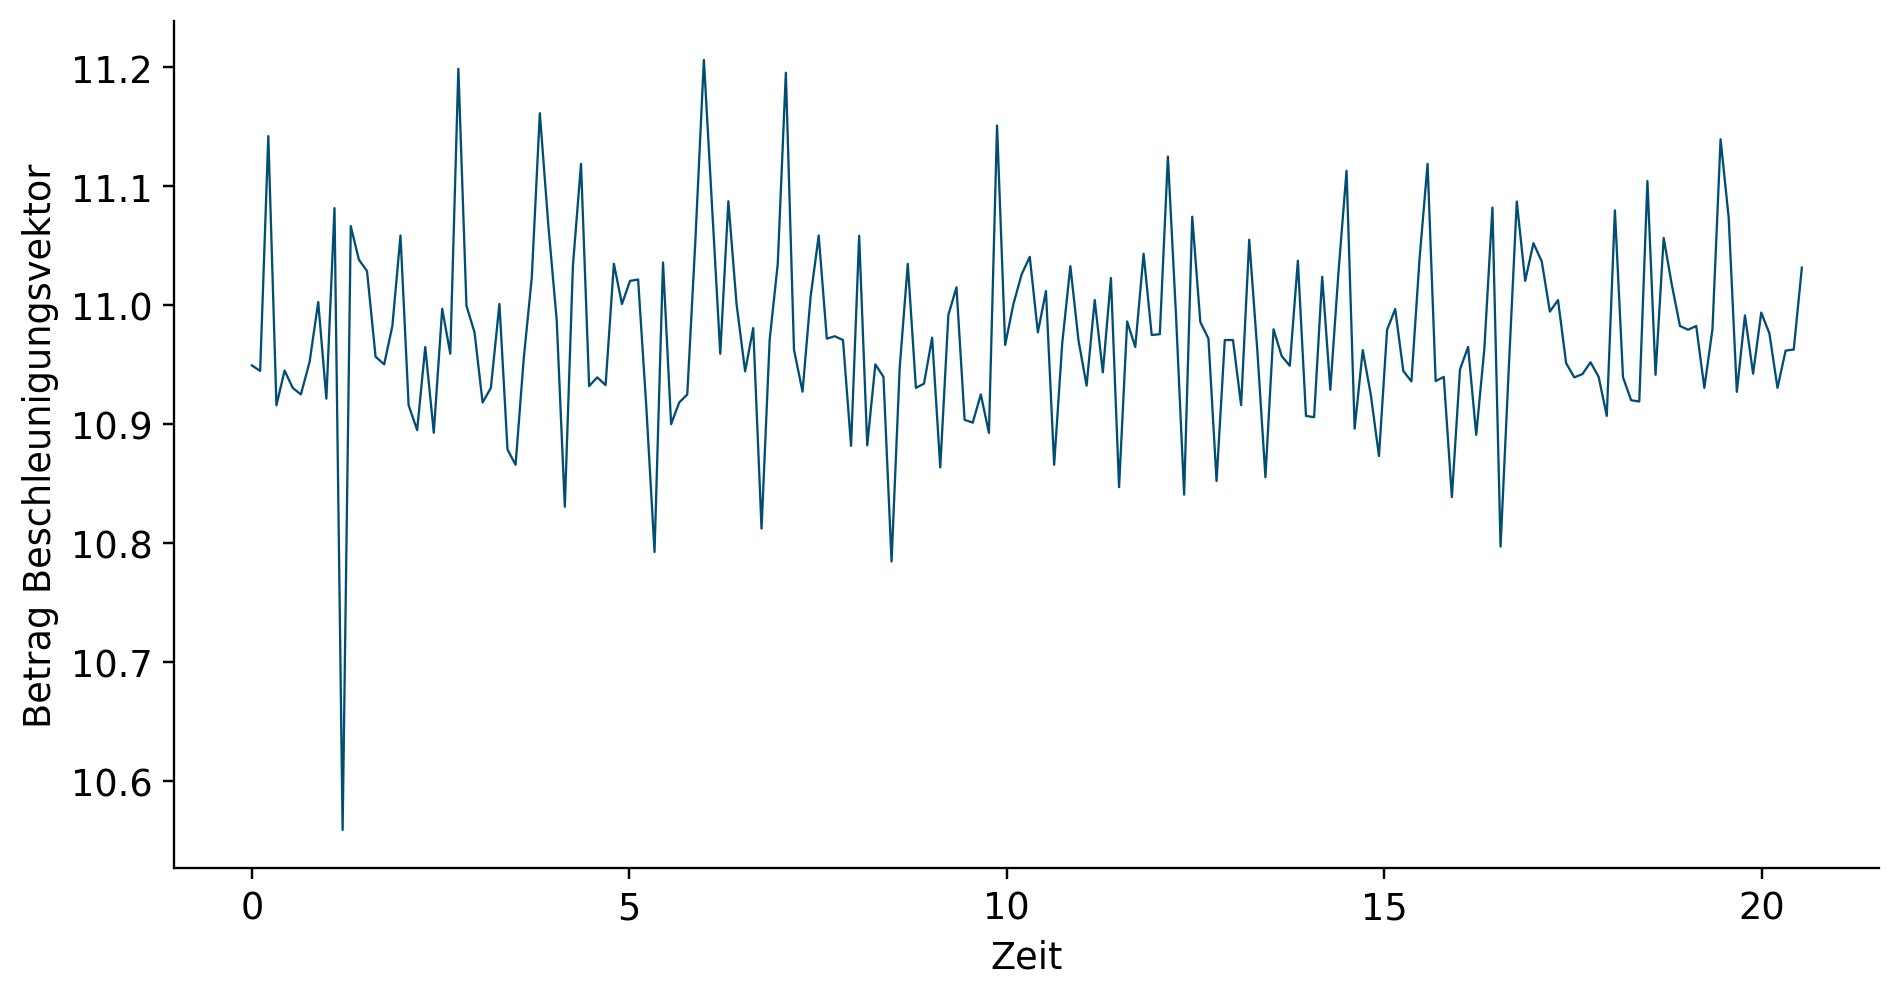

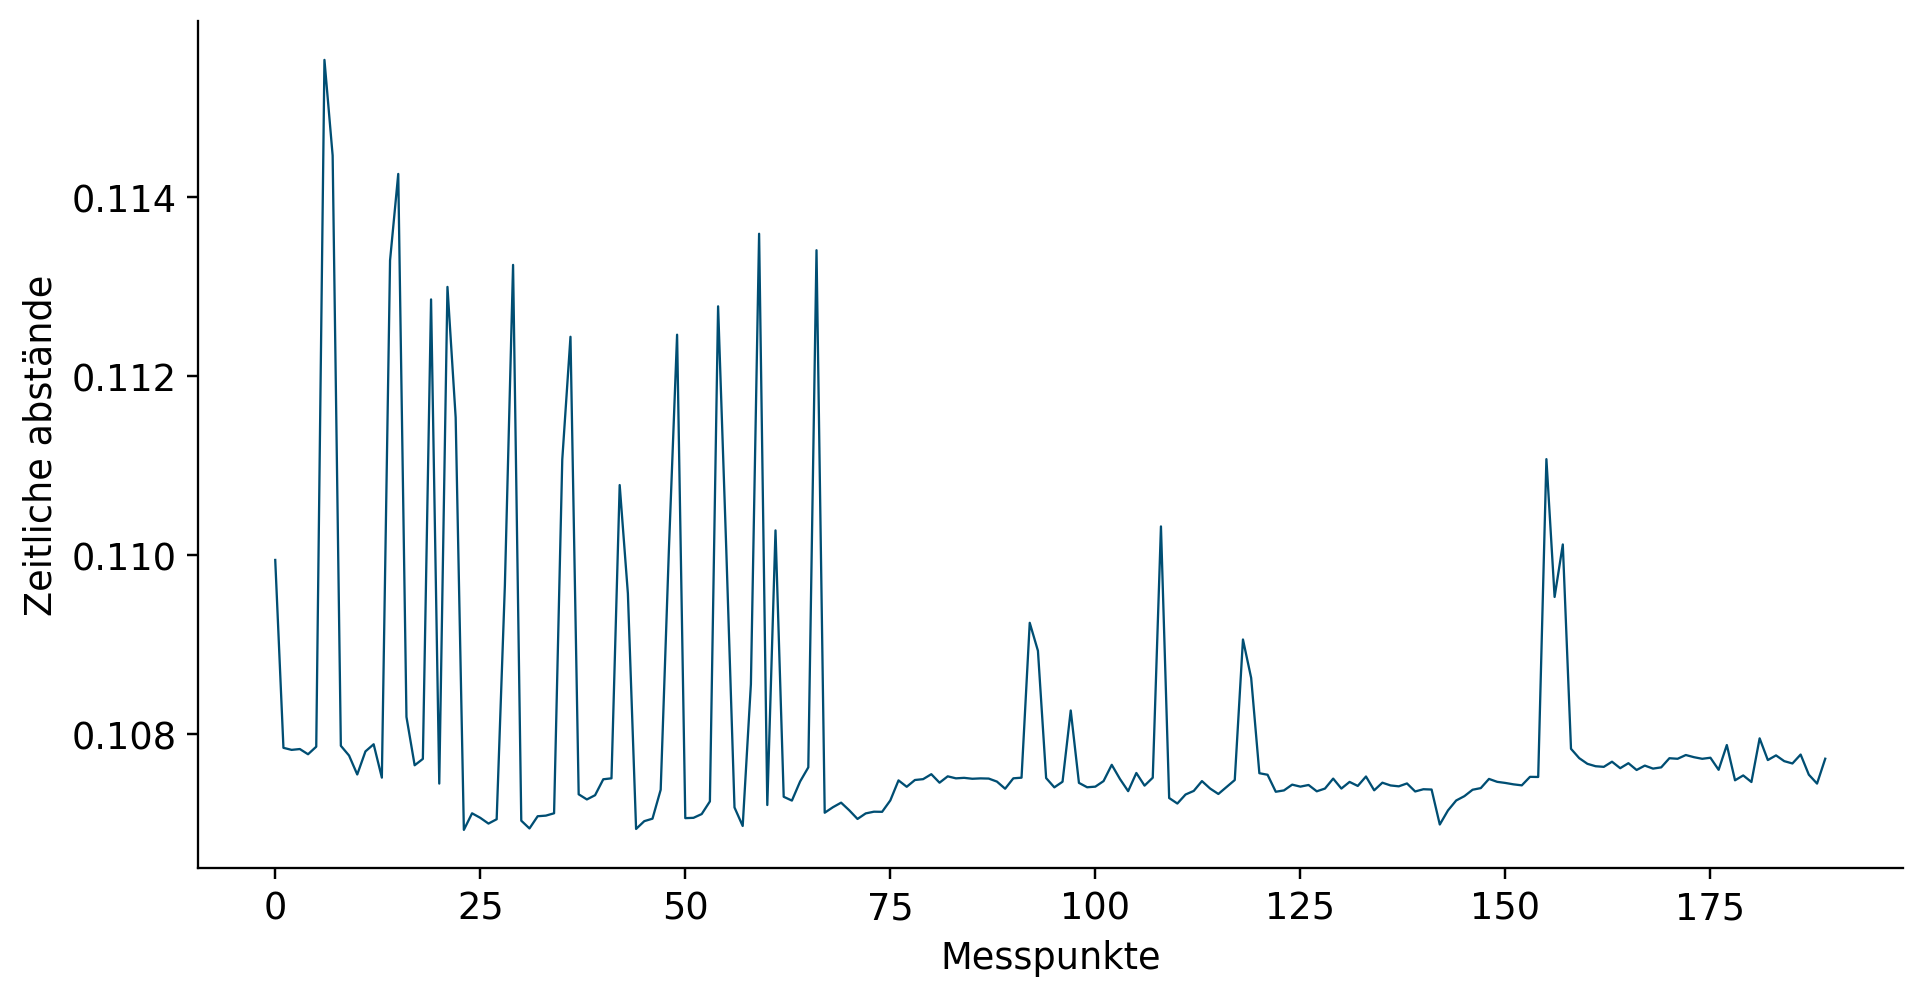

In [20]:
time_dif = []

#Zeitunterschiede berechen

for i in range(len_time-1):
    time_dif.append(time[i+1]-time[i])



x = np.array(time)
y = np.array(list_betrag)

z = []

for i in range(len_time-1):
    z.append(i)

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel('Zeit')
plt.ylabel('Betrag Beschleunigungsvektor')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(z,time_dif)
plt.xlabel("Messpunkte")
plt.ylabel('Zeitliche abstände')
plt.show()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [21]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

interpolation = interpolation(time, list_betrag)

# Interpolierte Zeit und Betrag in zwei verschiedenen Listen speichern

time_interpolation = interpolation[0]

betrag_interpolation = interpolation[1]



#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

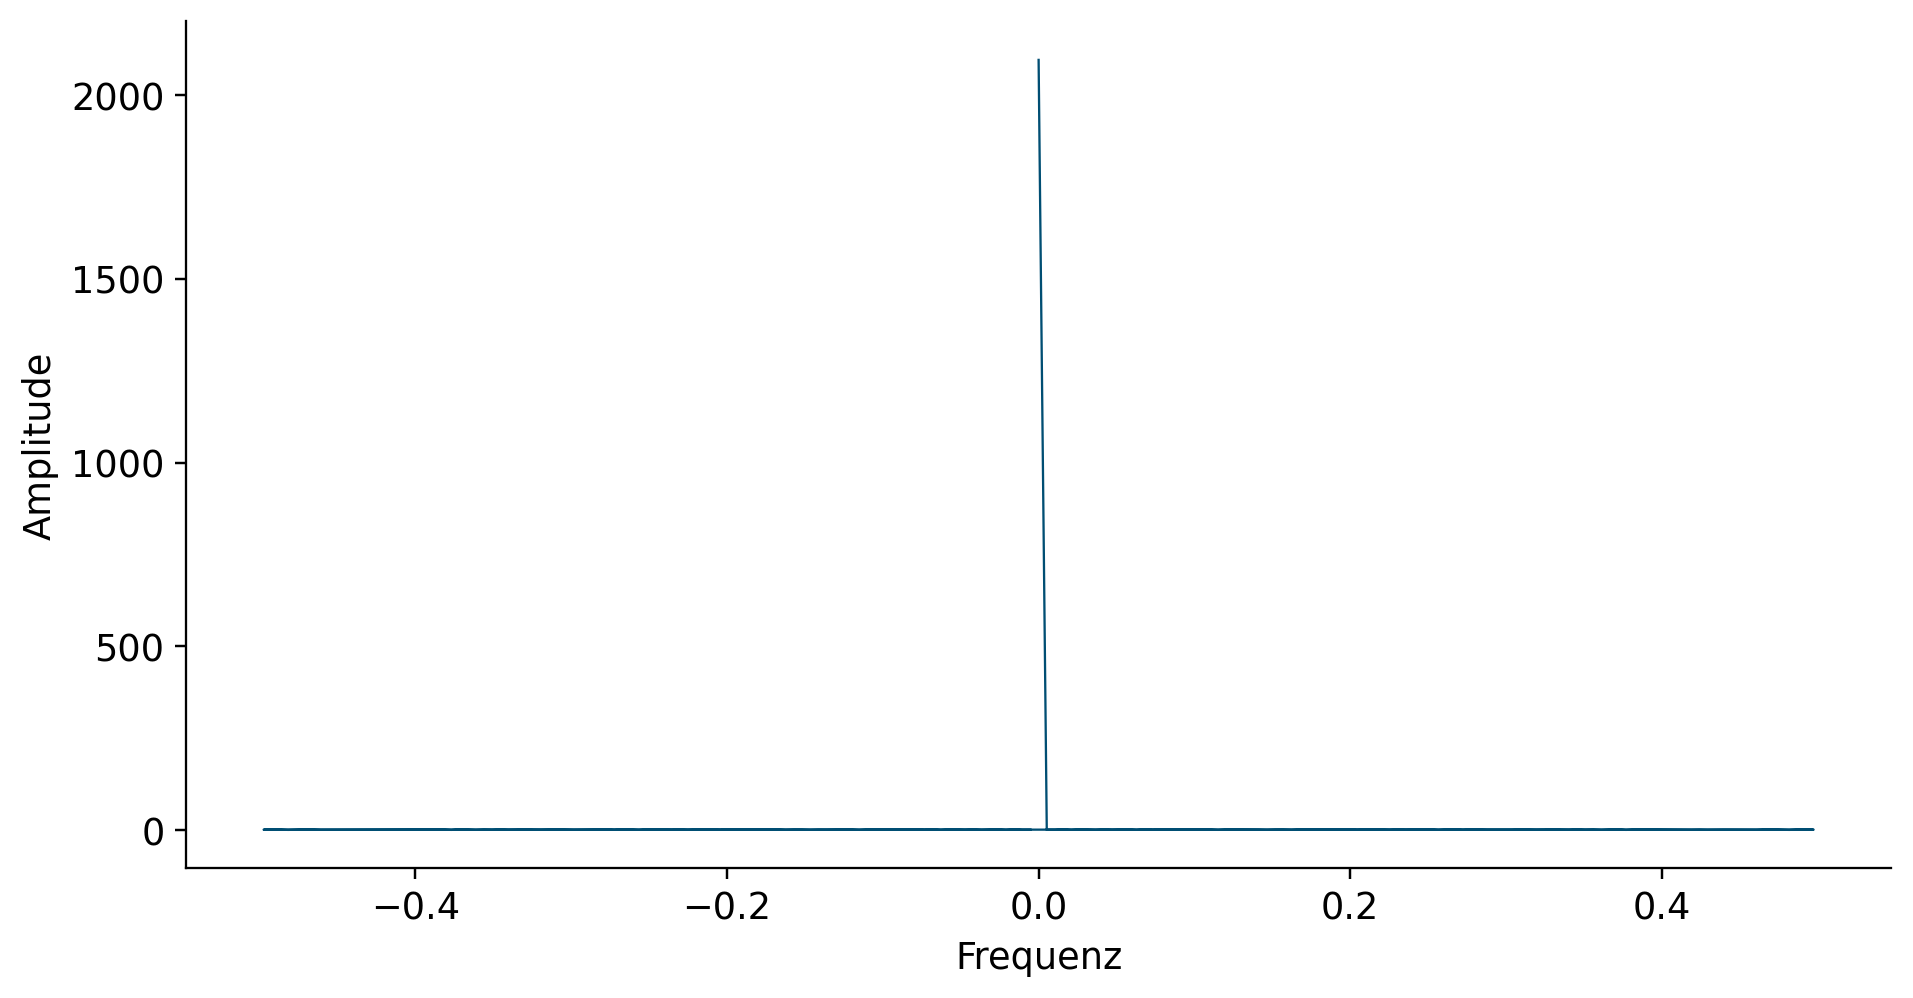

In [22]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

am_fr = my_fft(betrag_interpolation, time_interpolation)

amplitude = np.abs(am_fr[0])
frequenz = am_fr[1]


plt.figure(figsize=(10,5))
plt.plot(frequenz, amplitude)
plt.ylabel('Amplitude')
plt.xlabel('Frequenz')
plt.show()


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/IMG_0121.jpg" width="500">

- Beschreibung des Aufbaus: Der Sensor wurde an mein Handy angebracht
- Vorgangsbeschreibung: Das Handy hat mittels einer App angefangen zu vibrieren.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [23]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240110_155826_Noah_Michel_Handy"
h5_file_name = "data_20240110_155826_Noah_Michel_Handy.h5"

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240110_155826_Noah_Michel_Handy/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240110_155826_Noah_Michel_Handy/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240110_155826_Noah_Michel_Handy/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeafc6b-18d9-603c-b588-fc9a093ec219": {
    "type": "probe",
    "name": "Handy",
    "comment": "",
    "path": "measurement_data/data_2024

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [24]:
f = h5py.File("measurement_data/data_20240110_155826_Noah_Michel_Handy/data_20240110_155826_Noah_Michel_Handy.h5", "r")

rawdata = f.get('RawData')

for i in rawdata:
    key = i

acc_x = np.array(f.get("RawData/" + str(key) + "/acceleration_x"))
acc_y = np.array(f.get("RawData/" + str(key) + "/acceleration_y"))
acc_z = np.array(f.get("RawData/" + str(key) + "/acceleration_z"))
time = np.array(f.get("RawData/" + str(key) + "/timestamp"))

print(acc_x)
print(acc_y)
print(acc_z)
print(time)


#### 2. Betrag der Beschleunigung berechnen


In [25]:
len_time = len(time)

list_betrag = []

for i in range(len_time):
    list_betrag.append(get_vec_accel(acc_x[i], acc_y[i], acc_z[i]))


[11.250993078620704, 11.373414277198336, 12.134024483056978, 11.972084276309886, 11.554348013393085, 11.92166009184656, 11.600997533410126, 11.771836650374741, 11.539623023998226, 11.6153797761506, 11.730327606062543, 11.416558077155731, 11.598410815729585, 11.66350033135988, 11.500687900815432, 11.60292061631325, 11.399023183181276, 11.637680097679953, 11.52628102670059, 11.15615814003148, 11.563134084930375, 11.577231094236708, 11.36123151837943, 11.388556843508857, 11.676158417902847, 11.822899842959236, 11.773470443195372, 12.03438588937943, 12.044227146696418, 11.632654678478234, 11.723504519818583, 11.137384384731197, 11.383894538937488, 11.285950249878017, 11.65538402042087, 11.690382382447398, 11.198215309662062, 11.177103255953615, 11.924241208203957, 12.174662719852229, 11.910748701344904, 11.541023038928946, 11.37361721262069, 11.525079489349386, 11.558342510215478, 11.19910842707883, 12.122161868488327, 12.134278102137612, 11.900150567887344, 11.52728221215614, 11.556412009

#### 3. Darstellung der Messdaten

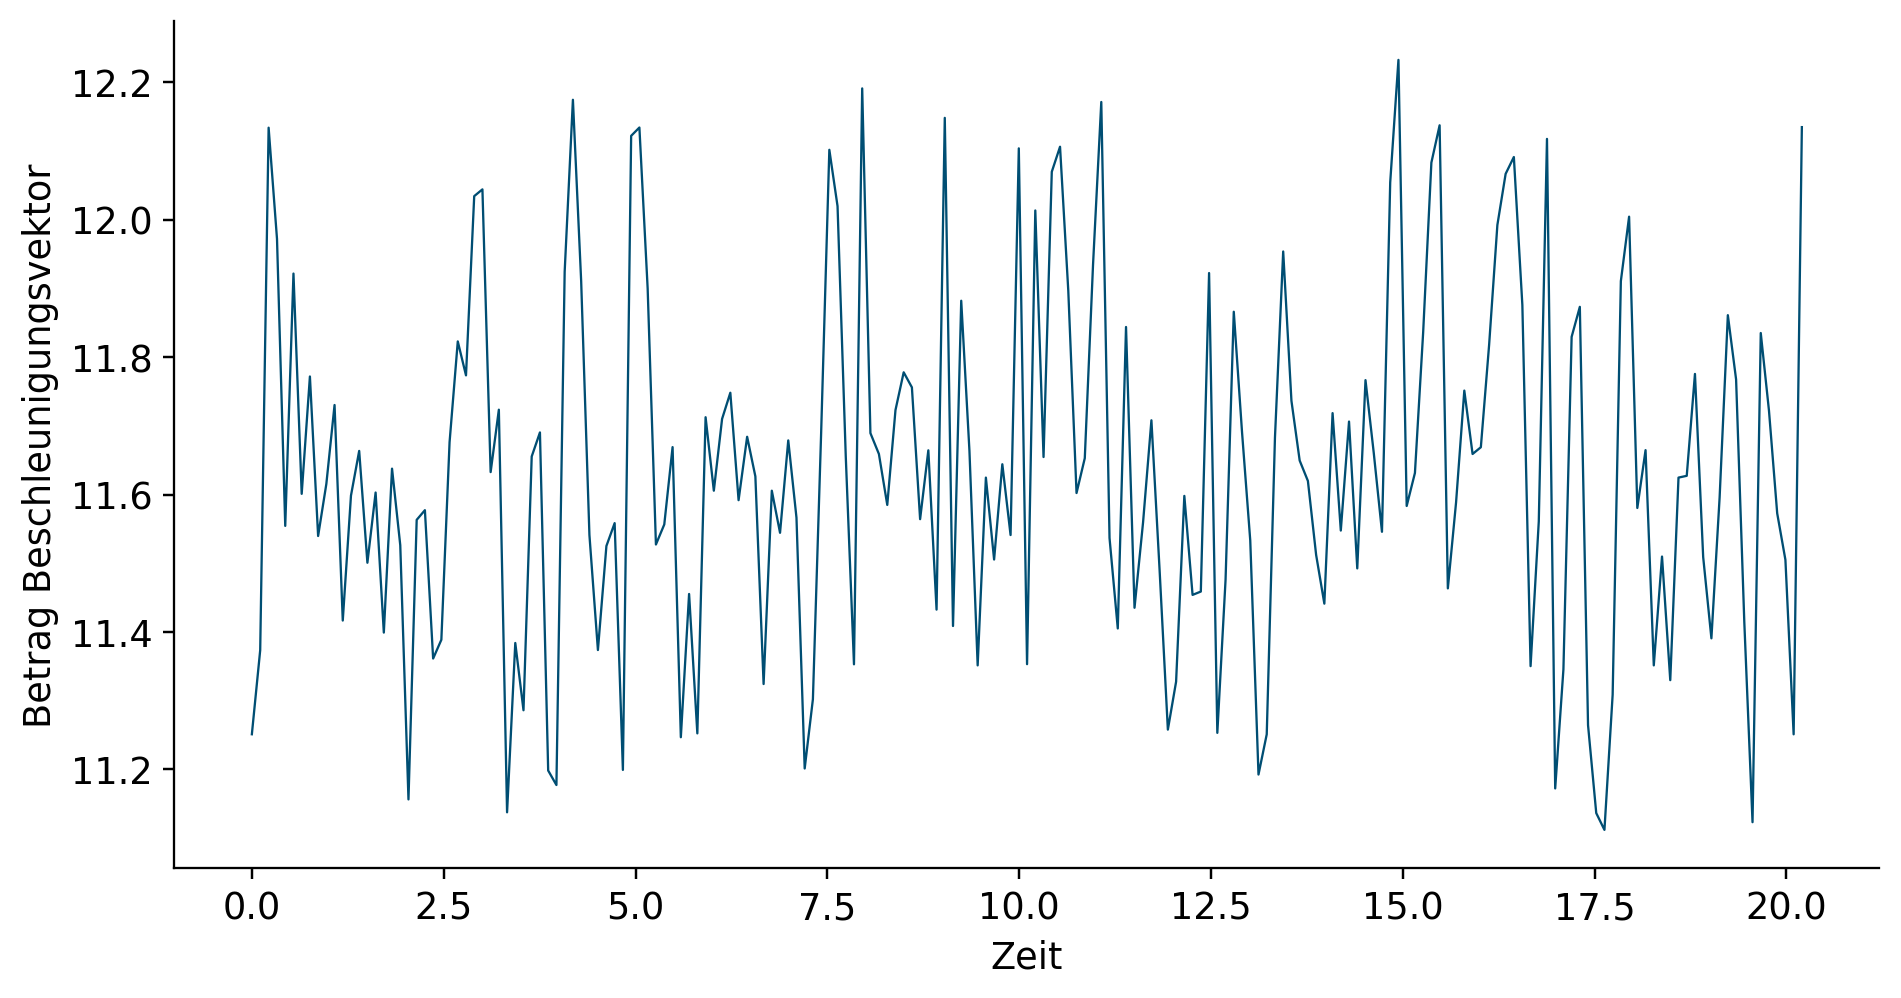

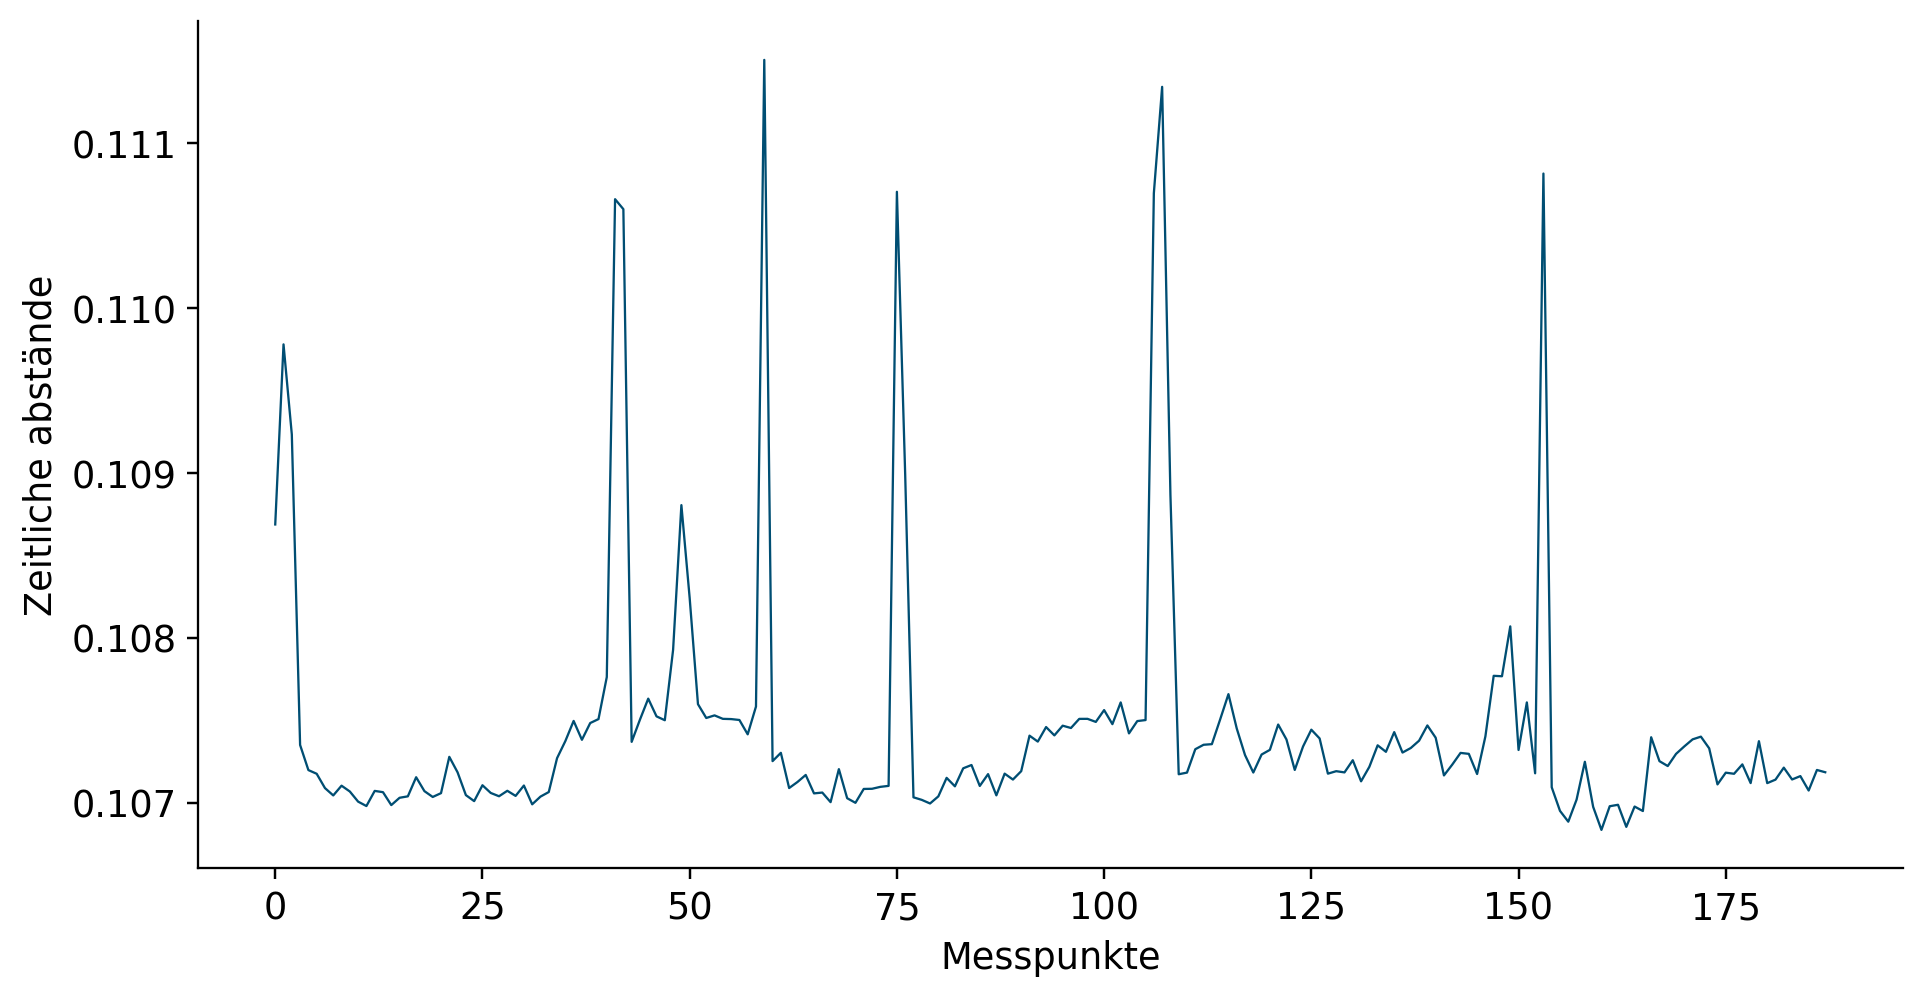

In [26]:
time_dif = []

for i in range(len_time-1):
    time_dif.append(time[i+1]-time[i])


x = np.array(time)
y = np.array(list_betrag)

z = []

for i in range(len_time-1):
    z.append(i)

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel('Zeit')
plt.ylabel('Betrag Beschleunigungsvektor')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(z,time_dif)
plt.xlabel("Messpunkte")
plt.ylabel('Zeitliche abstände')
plt.show()

#### 4. Interpolation der Messwerte



In [27]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

interpolation = interpolation(time, list_betrag)

time_interpolation = interpolation[0]

betrag_interpolation = interpolation[1]


#### 5 & 6. FFT durchführen und graphisch darstellen


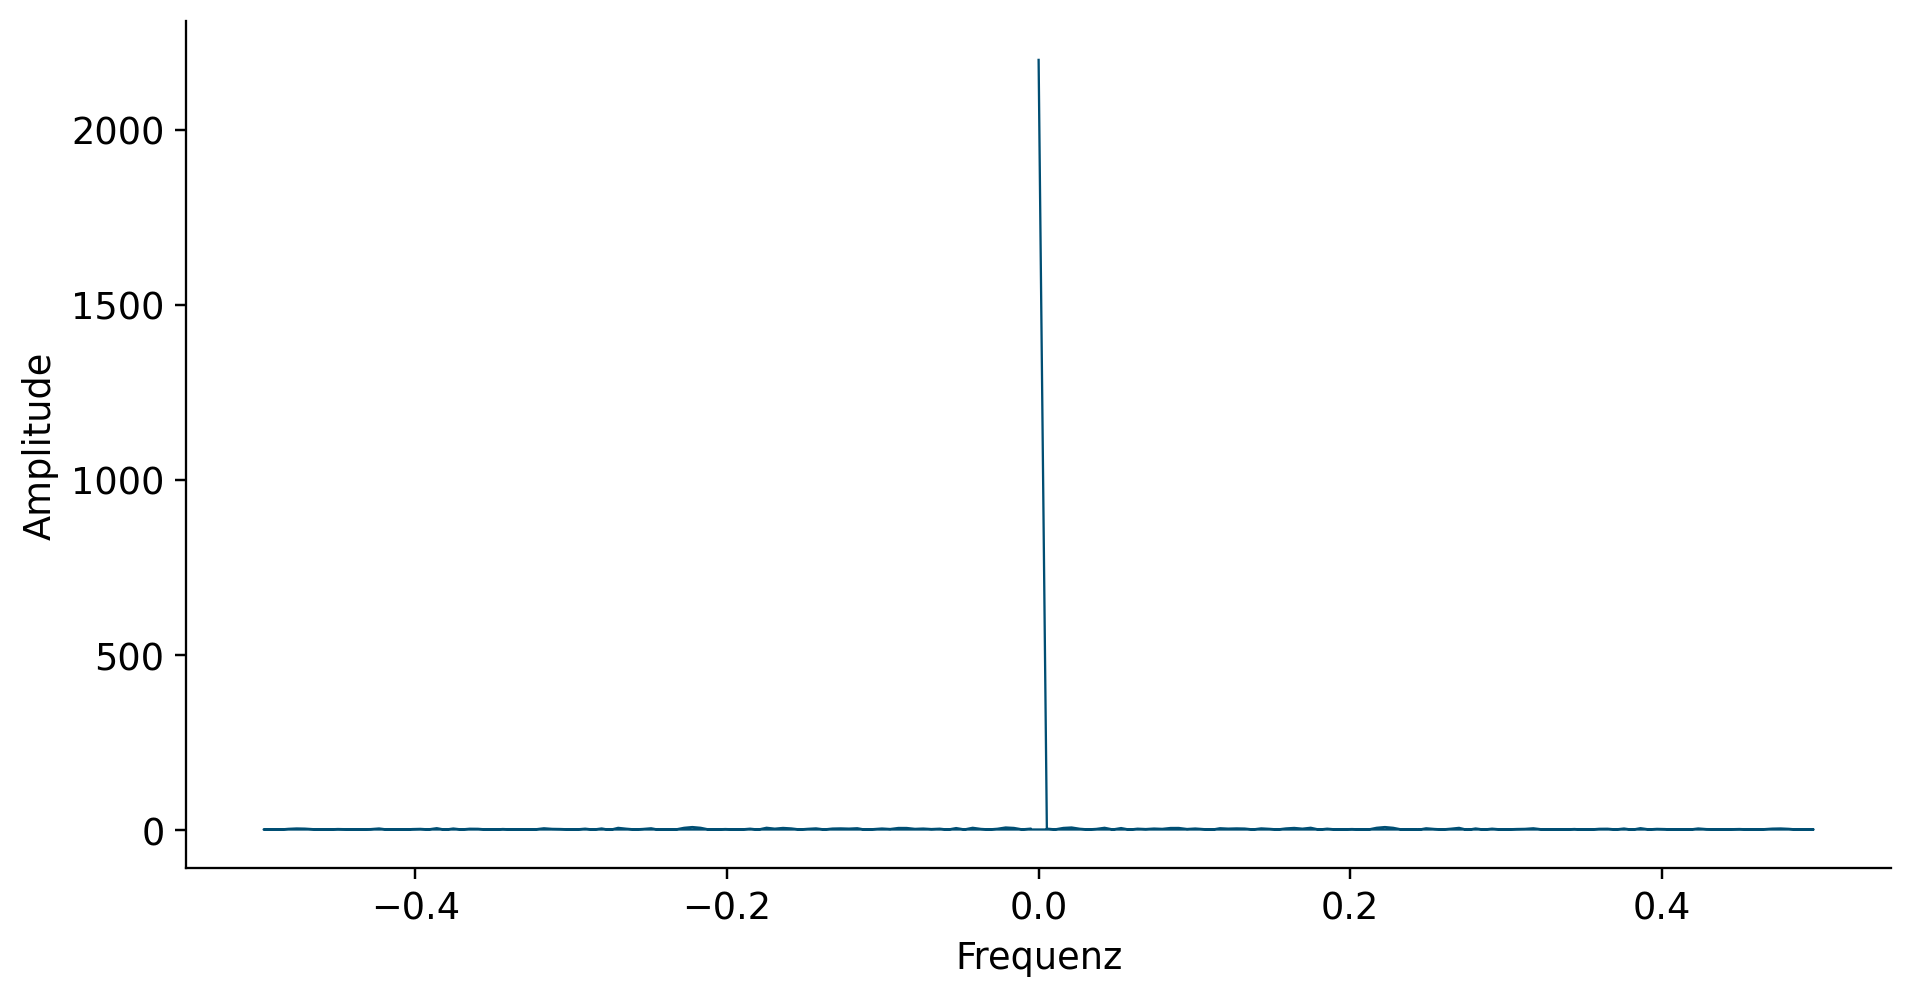

In [28]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

am_fr = my_fft(betrag_interpolation, time_interpolation)


amplitude = np.abs(am_fr[0])
frequenz = am_fr[1]


plt.figure(figsize=(10,5))
plt.plot(frequenz, amplitude)
plt.ylabel('Amplitude')
plt.xlabel('Frequenz')
plt.show()


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Das Handy hatte eine stärkere Vibrationskraft als der Lautsprecher. Das ist leicht zu erkennen. Natürlich können die Ergebnisse abweichen. Dies kann passieren wenn zum Beispiel der Sensor nicht gleich angebracht wurde (Tesafilm nicht gleich stark angebracht). 

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Das experiment war mal wieder sehr interresant und Lernreich. Auch wenn das Coden länger gedauert hat, gab es auch spaß daran.
Ansonsten hat alles gut geklappt.